In [1]:
import sys
import os


sys.path.append(os.path.abspath(r"C:\Users\sofi loran\Documents\Model TP"))

from imports import *

In [1]:
!pip install rdkit-pypi

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
file_path = 'updataset_clean.xlsx'
df_original = pd.read_excel(file_path)
df_original.head()

,Irritation,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1,0.460416,0.460844,0.707107,0.843281,0.378529,0.659899,0.434507,0.384064,0.434493,...,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
1,1,0.526279,0.526685,0.278318,0.691493,0.713980,0.805620,0.581212,0.520988,0.581175,...,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
2,1,0.076583,0.076808,0.882232,0.956513,0.417235,0.655363,0.499738,0.454191,0.498176,...,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
3,1,0.370459,0.370898,0.468582,0.739533,0.619348,0.779343,0.508303,0.447901,0.508281,...,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
4,1,0.100530,0.100797,0.715222,0.847785,0.480844,0.000000,0.474608,0.420754,0.474570,...,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0


In [5]:
file_path = 'rabbit_balanced.xlsx'
df = pd.read_excel(file_path)
df.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Irritation
0,0.115475,0.115577,0.324234,0.306088,0.566473,0.398167,0.189110,0.165640,0.189062,0.247074,...,0.0,0,0.0,0,0.0,0,0.0,0.277350,0.0,1
1,0.437912,0.438064,0.106913,0.240292,0.439388,0.384900,0.215185,0.199574,0.215150,0.263228,...,0.0,0,0.0,0,0.0,0,0.0,0.160128,0.0,1
2,0.837558,0.837621,0.114306,0.095302,0.333101,0.487005,0.558408,0.554732,0.558432,0.557971,...,0.0,0,0.0,0,0.0,0,0.0,0.000000,0.0,0
3,0.763428,0.763515,0.052517,0.206434,0.966983,0.515347,0.432265,0.431023,0.432268,0.440488,...,0.0,0,0.0,0,0.0,0,0.0,0.000000,0.0,0
4,0.603491,0.603619,0.132058,0.210742,0.898095,0.495430,0.476004,0.473851,0.475011,0.451594,...,0.0,0,0.0,0,0.0,0,0.0,0.000000,1.0,0


In [6]:
dt_features = ['BertzCT', 'HallKierAlpha','NOCount', 'EState_VSA3','VSA_EState8','MinPartialCharge','PEOE_VSA1','FpDensityMorgan3','PEOE_VSA9']
rf_features = ['HallKierAlpha', 'BertzCT', 'PEOE_VSA1', 'TPSA', 'Chi1', 'NOCount', 'HeavyAtomCount', 'HeavyAtomMolWt', 'SlogP_VSA2', 'AvgIpc', 'LabuteASA', 'Chi0']
xgb_features = ['BertzCT', 'PEOE_VSA1', 'HallKierAlpha', 'SlogP_VSA2', 'MinAbsEStateIndex', 'EState_VSA4', 'PEOE_VSA6', 'EState_VSA3', 'PEOE_VSA7', 'BalabanJ', 'PEOE_VSA9']
svm_features = ['PEOE_VSA11', 'EState_VSA2', 'VSA_EState6', 'SMR_VSA6', 'SMR_VSA10', 'PEOE_VSA9', 'fr_NH1', 'fr_amide']
knn_features = ['HeavyAtomCount', 'VSA_EState6', 'PEOE_VSA3', 'fr_NH2', 'NumValenceElectrons', 'MaxEStateIndex', 'FractionCSP3', 'PEOE_VSA9', 'EState_VSA2', 'SMR_VSA5', 'SlogP_VSA4', 'fr_para_hydroxylation', 'EState_VSA3', 'SMR_VSA4', 'NumAliphaticCarbocycles', 'PEOE_VSA12', 'PEOE_VSA11', 'PEOE_VSA2', 'Chi0', 'NumAromaticRings', 'Chi4v']

In [7]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Irritation'])  
y = df['Irritation']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train)

print(f"Train set: {len(X_train)} samples")
print(f"Validation set: {len(X_valid)} samples")
print(f"Test set: {len(X_test)} samples")


Train set: 582 samples
Validation set: 103 samples
Test set: 172 samples


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(f"Train set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")


Train set: 685 samples
Test set: 172 samples


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

knn_best_params =  {'n_neighbors': 5, 'p': 1}
knn_model = KNeighborsClassifier(**knn_best_params)
knn_model.fit(X_train[knn_features], y_train)

svm_best_params = {'C': 0.3664305513362939, 'kernel': 'rbf', "gamma": "scale", "class_weight": "balanced"}
svm_model = SVC(**svm_best_params, probability=True)
svm_model.fit(X_train[svm_features], y_train)

xgb_best_params = {'max_depth': 4, 'learning_rate': 0.07550295105184265, 'n_estimators': 87, 'min_child_weight': 9, 'gamma': 0.7354699157242321, 'subsample': 0.7124115318152912, 'colsample_bytree': 0.7705734335280694, 'lambda': 34.90172763807819, 'alpha': 10.639460255011622, 'early_stopping_rounds': 32}
xgb_model = XGBClassifier(**xgb_best_params, eval_metric='logloss')  # используйте XGBClassifier напрямую
xgb_model.fit(X_train[xgb_features], y_train, eval_set=[(X_train[xgb_features], y_train), (X_valid[xgb_features], y_valid)], verbose=0)

rf_best_params = {'n_estimators': 168, 'max_depth': 5, 'min_samples_split': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True, 'max_samples': 0.7657075794741888}
rf_model = RandomForestClassifier(**rf_best_params)
rf_model.fit(X_train[rf_features], y_train)

dt_best_params = {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 19, 'min_samples_leaf': 15, 'max_features': None, 'max_leaf_nodes': 16, 'min_impurity_decrease': 0.011690374897996215, 'splitter': 'best', 'class_weight': None}
dt_model = DecisionTreeClassifier(**dt_best_params)
dt_model.fit(X_train[dt_features], y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=16,
                       min_impurity_decrease=0.011690374897996215,
                       min_samples_leaf=15, min_samples_split=19)

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
# Get base model predictions (stacking inputs)
stacking_inputs = np.column_stack([
    xgb_model.predict(X_test[xgb_features]),
    dt_model.predict(X_test[dt_features]),
    rf_model.predict(X_test[rf_features]),
    svm_model.predict(X_test[svm_features]),
    knn_model.predict(X_test[knn_features])
])

# Fit a simple Logistic Regression model
meta_model = LogisticRegression()
meta_model.fit(stacking_inputs, y_test)

# Check coefficients to see which models contribute and how 
coefs = pd.DataFrame(meta_model.coef_, columns=[ "xgb", "dt", "rf", "svm", "knn"])
print(coefs)


        xgb        dt       rf       svm       knn
0  0.035577  0.810101  0.89461  1.359939  0.760837


In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

stacking_inputs = np.column_stack([
    xgb_model.predict(X_test[xgb_features]),
    dt_model.predict(X_test[dt_features]),
    rf_model.predict(X_test[rf_features]),
    svm_model.predict(X_test[svm_features]),
    #knn_model.predict(X_test[knn_features])
])

meta_model.fit(stacking_inputs, y_test)
meta_preds = meta_model.predict(stacking_inputs)
test_accuracy = accuracy_score(y_test, meta_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Perform k-fold cross-validation
cv_scores = cross_val_score(meta_model, stacking_inputs, y_test, cv=5, scoring='accuracy')

# Print mean and standard deviation of cross-validation scores
print(f"Cross-validation mean accuracy: {cv_scores.mean():.4f}")
print(f"Cross-validation standard deviation: {cv_scores.std():.4f}")

# Metrics
precision = precision_score(y_test, meta_preds, average='binary')
recall = recall_score(y_test, meta_preds, average='binary')
f1 = f1_score(y_test, meta_preds, average='binary')


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Test Accuracy: 0.8372
Cross-validation mean accuracy: 0.8314
Cross-validation standard deviation: 0.0562
Precision: 0.7972972972972973
Recall: 0.8194444444444444
F1 Score: 0.8082191780821918


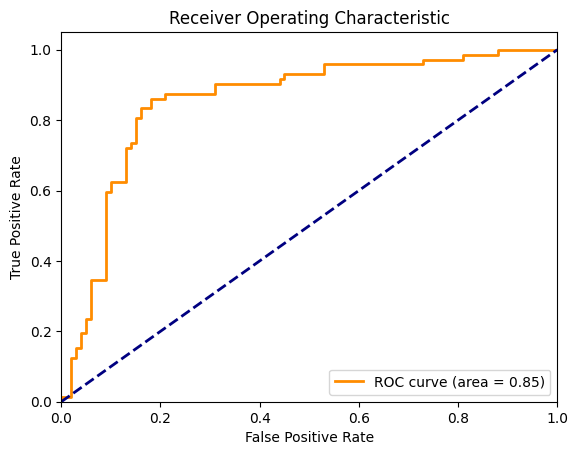

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

stacking_inputs = np.column_stack([
    xgb_model.predict_proba(X_test[xgb_features])[:, 1],
    dt_model.predict_proba(X_test[dt_features])[:, 1],
    rf_model.predict_proba(X_test[rf_features])[:, 1],
    svm_model.decision_function(X_test[svm_features]),  # for SVM
])

meta_probs = meta_model.predict_proba(stacking_inputs)[:, 1]
fpr, tpr, _ = roc_curve(y_test, meta_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [22]:
file_path = 'Rabbit_LAsso.xlsx'
df = pd.read_excel(file_path)
df.head()

,MaxEStateIndex,qed,AvgIpc,BertzCT,Chi4n,PEOE_VSA1,PEOE_VSA11,PEOE_VSA3,PEOE_VSA6,PEOE_VSA9,...,EState_VSA3,EState_VSA4,VSA_EState2,VSA_EState4,VSA_EState6,NumHeteroatoms,fr_NH1,fr_NH2,fr_amide,Irritation
0,0.115577,0.566473,0.452681,0.089220,0.254140,0.196324,0.000000,0.000000,0.335060,0.000000,...,0.000000,0.238203,0.000000,0.488840,0.000000,0.182574,0.000000,0.57735,0.000000,1
1,0.438064,0.439388,0.471835,0.146317,0.231654,0.178444,0.000000,0.000000,0.260868,0.230156,...,0.232360,0.408654,0.324960,0.000000,0.000000,0.258199,0.000000,0.00000,0.000000,1
2,0.837621,0.333101,0.868672,0.496390,0.473723,0.261267,0.680370,0.494776,0.349547,0.361580,...,0.385749,0.333665,0.418096,0.306249,0.403000,0.547723,0.408248,0.00000,0.408248,0
3,0.763515,0.966983,0.710703,0.435679,0.432964,0.315318,0.392847,0.349860,0.204384,0.385121,...,0.216291,0.000000,0.493126,0.165969,0.282099,0.516398,0.408248,0.00000,0.408248,0
4,0.603619,0.898095,0.656392,0.402744,0.405852,0.189052,0.000000,0.735221,0.282637,0.205850,...,0.290634,0.291480,0.618171,0.103547,0.226058,0.516398,0.408248,0.00000,0.912871,0


In [23]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Irritation']) 
y = df['Irritation']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

print(f"Train set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")


Train set: 728 samples
Test set: 129 samples


In [27]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

print("Training all models...")

knn_best_params =  {'n_neighbors': 5, 'metric': 'manhattan', 'p': 1}
knn_model = KNeighborsClassifier(**knn_best_params)
knn_model.fit(X_train, y_train)
print("✅ KNN trained")

svm_best_params = {'C': 0.3664305513362939, 'kernel': 'rbf', "gamma": "scale", "class_weight": "balanced"}
svm_model = SVC(**svm_best_params, probability=True)
svm_model.fit(X_train, y_train)
print("✅ SVM trained")

xgb_best_params = {'max_depth': 4, 'learning_rate': 0.07550295105184265, 'n_estimators': 87, 'min_child_weight': 9, 'gamma': 0.7354699157242321, 'subsample': 0.7124115318152912, 'colsample_bytree': 0.7705734335280694, 'lambda': 34.90172763807819, 'alpha': 10.639460255011622}
xgb_model = XGBClassifier(**xgb_best_params, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
print("✅ XGBoost trained")

rf_best_params = {'n_estimators': 168, 'max_depth': 5, 'min_samples_split': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True, 'max_samples': 0.7657075794741888}
rf_model = RandomForestClassifier(**rf_best_params)
rf_model.fit(X_train, y_train)
print("✅ Random Forest trained")

dt_best_params = {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 19, 'min_samples_leaf': 15, 'max_features': None, 'max_leaf_nodes': 16, 'min_impurity_decrease': 0.011690374897996215, 'splitter': 'best', 'class_weight': None}
dt_model = DecisionTreeClassifier(**dt_best_params)
dt_model.fit(X_train, y_train)
print("✅ Decision Tree trained")

print("\n🎯 All models trained successfully!")

Training all models...
✅ KNN trained
✅ SVM trained
✅ XGBoost trained
✅ Random Forest trained
✅ Decision Tree trained

🎯 All models trained successfully!


In [28]:
from sklearn.ensemble import VotingClassifier
voting_hard = VotingClassifier(
    estimators=[
        ("xgb", xgb_model),
        ('rf', rf_model), 
        ('dt', dt_model), 
        ('knn', knn_model), 
        ('svm', svm_model)
    ],
    voting='hard' 
)
voting_hard.fit(X_train, y_train)
y_pred_hard = voting_hard.predict(X_test)
acc_hard = accuracy_score(y_test, y_pred_hard)
print("Testing accuracy: ", acc_hard)

# Metrics
precision = precision_score(y_test, y_pred_hard, average='binary')
recall = recall_score(y_test, y_pred_hard, average='binary')
f1 = f1_score(y_test, y_pred_hard, average='binary')


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Testing accuracy:  0.7906976744186046
Precision: 0.7454545454545455
Recall: 0.7592592592592593
F1 Score: 0.7522935779816514


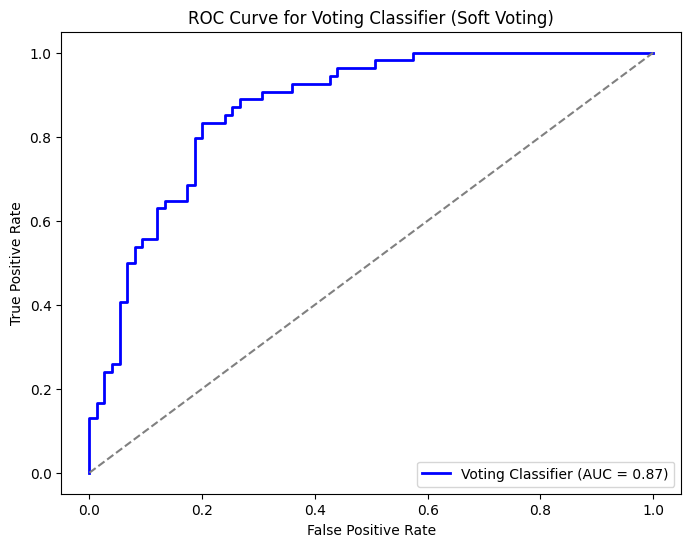

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

voting_soft = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('dt', dt_model),
        ('rf', rf_model),
        ('svm', svm_model),
        ('knn', knn_model)
    ],
    voting='soft'  
)

voting_soft.fit(X_train, y_train)

y_probs = voting_soft.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Voting Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier (Soft Voting)')
plt.legend(loc='lower right')
plt.show()

In [34]:
import joblib

joblib.dump(voting_soft, 'ensamble_model.pkl')

print("Model saved successfully as ensamble_model.pkl")

Model saved successfully as ensamble_model.pkl


In [33]:
%whos

Variable                 Type                      Data/Info
------------------------------------------------------------
DecisionTreeClassifier   ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
KNeighborsClassifier     ABCMeta                   <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
LogisticRegression       type                      <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
RandomForestClassifier   ABCMeta                   <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
SVC                      ABCMeta                   <class 'sklearn.svm._classes.SVC'>
VotingClassifier         ABCMeta                   <class 'sklearn.ensemble.<...>voting.VotingClassifier'>
X                        DataFrame                 Shape: (857, 21)
XGBClassifier            type                      <class 'xgboost.sklearn.XGBClassifier'>
X_test                   DataFrame                 Shape: (129, 21)
X_train                  DataF